In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import graphviz
import os
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다.
X, y = make_blobs(random_state = 0)

# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 모델 객체를 만들고 훈련 세트로 학습시킵니다.
logreg = LogisticRegression().fit(X_train, y_train)

# 모델을 테스트 세트로 평가합니다.
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# 5.1 교차 검증

일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법입니다.  
**k-겹 교차 검증**(k-fold cross-validation)은 가장 널리 사용되는 방법으로 주로 5와 10 사이의 k값을 사용합니다.  
(k겹 교차 검증을 하려면 데이터를 먼저 **폴드**(fold)라고 하는 비슷한 크기의 '부분 집합' k개로 나눕니다.

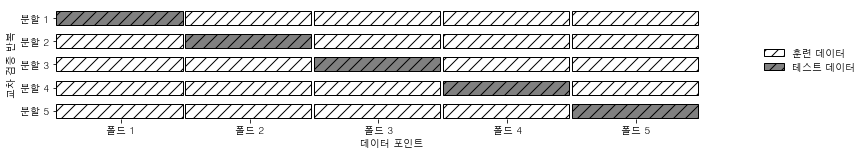

In [3]:
mglearn.plots.plot_cross_validation()

-> 보통 데이터의 첫 번째 1/k 조각이 첫 번째 폴드이고 두 번째 1/k 조각이 두 번째 폴드가 됩니다.

## 5.1.1 scikit-learn의 교차 검증

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 :", scores)

교차 검증 점수 : [0.961 0.922 0.958]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

-> 3겹 교차 검증을 수행했기 때문에 3개의 점수가 반환

In [5]:
# 5겹 교차 검증
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print("교차 검증 점수 :", scores)

교차 검증 점수 : [1.    0.967 0.933 0.9   1.   ]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [6]:
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))

교차 검증 평균 점수 : 0.96


In [7]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv = 5, return_train_score = True)
display(res)

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

{'fit_time': array([0.004, 0.004, 0.004, 0.003, 0.004]),
 'score_time': array([0.   , 0.001, 0.001, 0.001, 0.001]),
 'test_score': array([1.   , 0.967, 0.933, 0.9  , 1.   ]),
 'train_score': array([0.95 , 0.967, 0.967, 0.975, 0.958])}

In [8]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수 :\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,4.35e-03,0.00e+00,1.00,0.95
1,4.04e-03,9.95e-04,0.97,0.97
2,4.35e-03,9.97e-04,0.93,0.97
3,3.26e-03,1.01e-03,0.90,0.97
4,4.26e-03,1.00e-03,1.00,0.96


평균 시간과 점수 :
 fit_time       4.05e-03
score_time     8.00e-04
test_score     9.60e-01
train_score    9.63e-01
dtype: float64


## 5.1.3 계층별 k-겹 교차 검증과 그 외 전략들

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
print("iris 레이블 :\n", iris.target)

iris 레이블 :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


iris 데이터는 1/3씩 클래스 0, 1, 2에 해당되므로 3겹 교차 검증을 적용하게 되면 정확도는 0이 됩니다.  
-> 계층별 k-겹 교차 검증(stratified k-fold cross-validation)을 사용합니다.

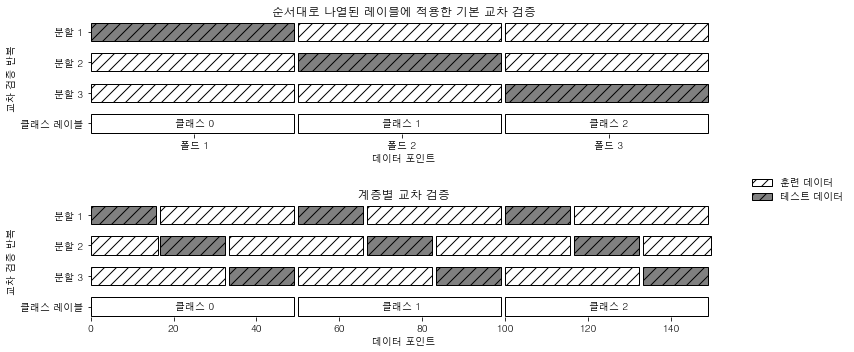

In [10]:
mglearn.plots.plot_stratified_cross_validation()

-> 폴드 안의 클래스 비율이 전체 dataset의 클래스 비율과 같도록 데이터를 나눕니다.  
(ex) 샘플의 90%가 클래스 A, 10%가 클래스 B라면,  
계층별 교차 검증은 각 폴드도 A샘플이 90%, B샘플이 10%로 되도록 만듭니다.

### 교차 검증 상세 옵션

cv 매개변수에 **교차 검증 분할기**를 전달함으로써 데이터를 분할할 때 더 세밀하게 제어할 수 있습니다.  
-> 먼저 model_selection 모듈에서 kfold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체를 생성해야 함

In [11]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
print("교차 검증 점수 :\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :
 [1.    0.933 0.433 0.967 0.433]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [12]:
kfold = KFold(n_splits = 3)
print("교차 검증 점수 :\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :
 [0. 0. 0.]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-> iris dataset에 3겹 교차 검증을 사용하는 것이 좋지 않은 이유

In [13]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수:
 [0.9  0.96 0.96]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

-> shuffle 매개변수를 true로 줘서 샘플의 순서를 섞어 3겹 교차하면 결과를 좋게 만듦

### LOOCV

**LOOCV**(leave-one-out cross-validation) 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k겹 교차 검증으로 생각할 수 있습니다.  
(각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용)  
-> 작은 dataset에서는 이따금 더 좋은 결과를 만들어냄

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)

print("교차 검증 분할 횟수 : ", len(scores))
print("평균 정확도 : {:.2f}".format(scores.mean()))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

교차 검증 분할 횟수 :  150
평균 정확도 : 0.95


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

### 임의 분할 교차 검증

**임의 분할 교차 검증**(shuffle-split cross-validation)에서는 train_size만큼의 포인트로 훈련세트를 만들고,  
test_size만큼의 (훈련 세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할합니다.  
-> n_splits 횟수만큼 반복

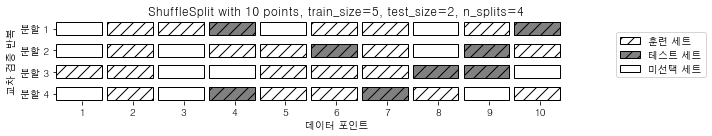

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
# dataset의 50%는 훈련 세트, 50%는 테스트 세트로 10번 반복 분할
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수 :\n", scores)

교차 검증 점수 :
 [0.947 0.947 0.947 0.933 0.92  0.933 0.84  0.947 0.933 0.947]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용합니다.  
데이터를 부분 샘플링하는 방식은 대규모 dataset으로 작업할 때 도움이 됩니다.

### 그룹별 교차 검증

(**ex**) dataset에 없는 사람의 표정을 정확히 구분할 수 있는 분류기를 만드는 것이 목표  
-> 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야 함  
groups 매개변수로 사진 속 사람이 누구인지 기록한 배열을 전달받을 수 있는 GroupKFold 사용

In [17]:
from sklearn.model_selection import GroupKFold

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples = 12, random_state = 0)

# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3))
print("교차 검증 점수 :\n", scores)

교차 검증 점수 :
 [0.75  0.8   0.667]


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

-> groups : 4개의 그룹 중 각 포인트가 어떤 그룹에 속하는지를 나타냄

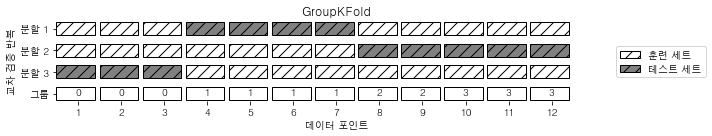

In [18]:
mglearn.plots.plot_group_kfold()

-> 한 그룹 전체가 훈련 세트 아니면 테스트 세트에 있음

## 5.1.4 반복 교차 검증

회귀에서는 RepeatedKFold, 분류에서는 RepeatedStratifiedKFold를 사용합니다.

In [19]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state = 42)
scores = cross_val_score(logreg, iris.data, iris.target, cv = rskfold)

print("교차 검증 점수 :\n", scores)
print("교차 검증 평균 점수 : {:.3f}".format(scores.mean()))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

교차 검증 점수 :
 [0.967 0.967 0.967 0.933 0.967 0.867 0.967 0.967 0.933 0.967 1.    1.
 0.933 0.933 0.933 1.    0.967 0.967 0.9   0.967 0.967 0.967 1.    0.9
 0.967 0.933 1.    0.967 0.967 0.933 0.967 0.933 0.967 0.967 0.967 0.967
 0.933 0.933 0.967 1.    0.967 0.967 0.867 1.    0.933 1.    0.967 1.
 0.933 0.9  ]
교차 검증 평균 점수 : 0.957


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

전체 검증 점수는 n_splits x n_repeats갯수만큼 만들어집니다.  
(기본값을 사용하여 RepeatedStratifiedKFold의 객체를 만들면 5 x 10 = 50개의 모델을 훈련하여 평가한 점수가 반환됨)

# 5.2 그리드 서치

모델에서 중요한 매개변수의 (일반화 성능을 최대로 높여주는) 값을 찾는 일 중 가장 널리 사용하는 방법은 **그리드 서치**(grid search)로  
관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것입니다.

## 5.2.1 간단한 그리드 서치

In [21]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("훈련 세트의 크기 : {}, 테스트 세트의 크기 : {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gam in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma = gam, C = c)
        svm.fit(X_train, y_train)
        
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': c, 'gamma': gam}
            
print("최고 점수 : {:.2f}".format(best_score))
print("최적 파라미터 :", best_parameters)

훈련 세트의 크기 : 112, 테스트 세트의 크기 : 38
최고 점수 : 0.97
최적 파라미터 : {'C': 100, 'gamma': 0.001}


## 5.2.2 매개변수 과대적합과 검증 세트

여러 가지 매개변수 값으로 많이 시도해보고 테스트 세트 정확도가 가장 높은 조합을 선택했지만  
이 정확도는 새로운 데이터에까지 이어지지 않을 수 있습니다.  
-> 평가를 위해 모델을 만들 때 사용하지 않은 독립된 dataset이 필요

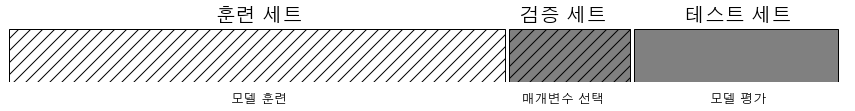

In [22]:
mglearn.plots.plot_threefold_split()

검증 세트를 사용해 최적의 매개변수를 선택한 후, 그 매개변수에서 훈련 세트와 검증 세트 데이터를 모두 이용해 모델을 다시 만듭니다.  
(모델을 만들 때 가능한 많은 데이터를 이용하기 위해서)

In [23]:
from sklearn.svm import SVC

# 데이터를 훈련 + 검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)

# 훈련 + 검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print("훈련 세트의 크기 : {}, 검증 세트의 크기 : {}, 테스트 세트의 크기 : {}\n".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gam in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma = gam, C = c)
        svm.fit(X_train, y_train)
        
        # 검증 세트로 SVC를 평가합니다.
        score = svm.score(X_valid, y_valid)
        
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': c, 'gamma': gam}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적 파라미터 : ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수 : {:.2f}".format(test_score))

훈련 세트의 크기 : 84, 검증 세트의 크기 : 28, 테스트 세트의 크기 : 38

검증 세트에서 최고 점수 : 0.96
최적 파라미터 :  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수 : 0.92


-> 이 모델은 새로운 데이터에 대해 92%만 정확하게 분류

최종 평가에만 사용하도록 **테스트 세트를 분리해 유지**하는 것이 중요!!  
모든 탐색적 분석과 모델 선택을 위해서는 훈련 세트와 검증 세트를 사용하는 것을 권장하며, 마지막 평가를 위해 테스트 세트를 보관하는 것이 좋습니다.

## 5.2.3 교차 검증을 사용한 그리드 서치

일반화 성능을 더 잘 평가하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고,  
교차 검증을 사용해서 각 매개변수 조합의 성능을 평가할 수 있습니다.

In [24]:
for gam in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma = gam, C = c)
        
        # 교차 검증을 적용합니다.
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        
        # 교차 검증 정확도의 평균을 계산합니다.
        score = np.mean(scores)
        
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': c, 'gamma': gam}
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

-> 5겹 교차 검증으로 C와 gamma 설정에 대한 SVM의 정확도를 평가하려면 36 x 5 = 180개의 모델을 만들어야 함

#### 위 코드에서 최적의 매개변수를 선택하는 방법

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


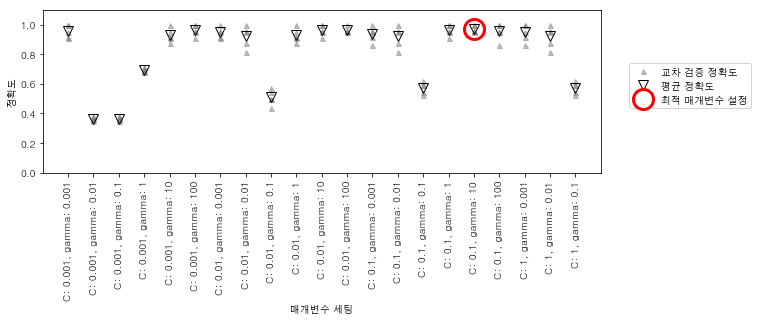

In [25]:
mglearn.plots.plot_cross_val_selection()

-> 각 매개변수 설정마다 교차 검증 분할에 한 개씩, 모두 다섯 개의 값을 계산

**※ note ※**  
교차 검증은 그리드 서치와 같은 매개변수 탐색 방법과 합쳐서 많이 사용하기 때문에  
많은 사람들이 교차 검증이란 용어를 교차 검증을 사용한 그리드 서치라는 의미로 주로 사용

#### 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름

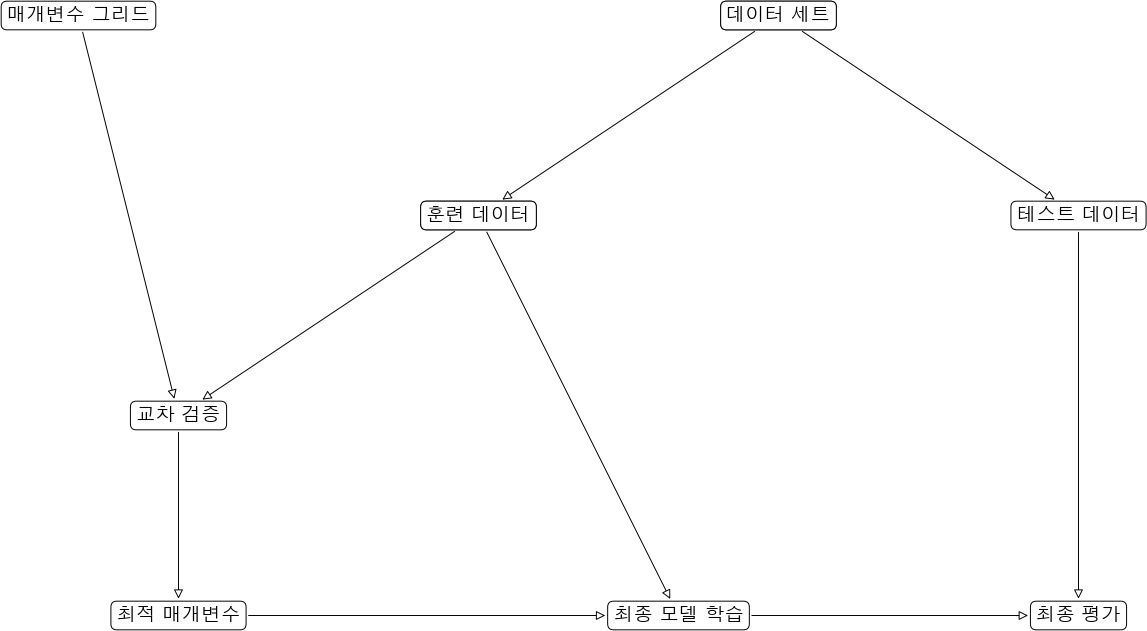

In [26]:
mglearn.plots.plot_grid_search_overview()

In [27]:
# 매개변수 설정 값을 딕셔너리로 만듭니다.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [28]:
# 모델은 SVC, 매개변수 그리드는 param_grid, 5겹 교차 검증으로 GridSearchCV 객체 생성
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)

In [29]:
# param_grid에 설정된 매개변수 조합에 대한 교차 검증 수행
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
grid_search.fit(X_train, y_train)

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

-> GridSearchCV 객체의 fit 메서드
    - 최적의 매개변수를 찾음  
    - 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 dataset에 대해 새로운 모델을 자동으로 만듦

In [30]:
print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수 : 0.97


In [31]:
print("최적 매개변수 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

최적 매개변수 : {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수 : 0.97


※**주의**※  
테스트 세트로 score메서드에서 계산하는 모델의 일반화 성능과 best_score_를 혼동해서는 안됩니다!!  
score 메서드는 전체 훈련 세트에서 학습한 모델에 대한 것이고, best_score_ 속성에는 훈련 세트에서 수행한 교차 검증의 평균 정확도가 저장됩니다.

In [32]:
print("최고 성능 모델 :\n", grid_search.best_estimator_)

최고 성능 모델 :
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### 교차 검증 결과 분석

In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)

# DataFrame으로 변환합니다.
results = pd.DataFrame(grid_search.cv_results_)

# 처음 다섯 개 행을 출력합니다.
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.0026,0.002,0.0008,0.0012,0.0013
std_fit_time,0.0014,0.0023,0.0016,0.0015,0.0015
mean_score_time,0,0.0002,0,0.0004,0.0004
std_score_time,0,0.0004,0,0.00049,0.00049
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.38,0.38,0.38,0.38,0.38
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


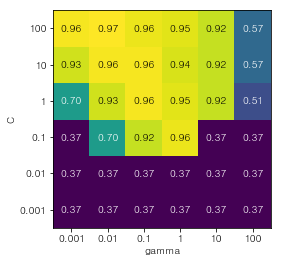

In [34]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'],
                      ylabel = 'C', yticklabels = param_grid['C'], cmap = "viridis");

-> 교차 검증의 정확도가 높으면 밝은 색, 낮으면 어두운 색

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


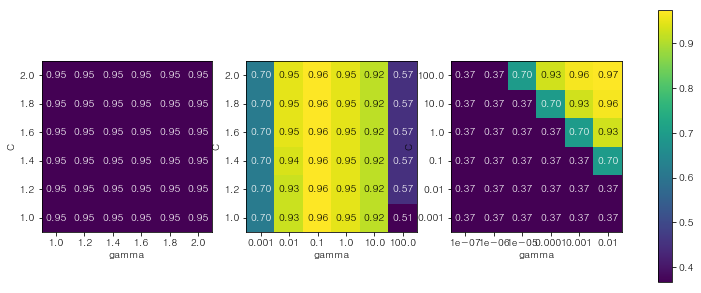

In [35]:
# 검색 범위가 적절하게 선택되지 않아서 바람직하지 않은 결과를 내는 그래프
fig, axes = plt.subplots(1, 3, figsize = (13, 5))

param_grid_linear = {'C' : np.linspace(1, 2, 6), 'gamma' : np.linspace(1, 2, 6)}

param_grid_one_log = {'C' : np.linspace(1, 2, 6), 'gamma' : np.logspace(-3, 2, 6)}

param_grid_range = {'C' : np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for paramg, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), paramg, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = paramg['gamma'],
                                         yticklabels = paramg['C'], cmap = "viridis", ax = ax)
    
plt.colorbar(scores_image, ax = axes.tolist());

- 첫 번째 그래프는 점수 변화가 전혀 없어서 같은 색 -> 매개변수 C와 gamma의 스케일과 범위가 부적절할 때 발생  
    (매개변수 설정이 바뀌어도 정확도에 아무런 변화가 없다면, 전혀 중요치 않은 매개변수여서 그럴 수도 있음)  
- 두 번째 그래프는 gamma 매개변수만 정확도에 영향을 준다는 뜻  
    (gamma 매개변수는 적절한 범위를 탐색하고 있지만 C 매개변수는 그렇지 못하던지, 아니면 중요한 매개변수가 아닐 수도 있음)
- 세 번째 그래프는 C와 gamma 둘 모두에 따라 값이 변함  
    -> 그래프 왼쪽 아래 영역에서는 변화가 없으므로 매개 변수 검색 범위를 조정해야 함

### 비대칭 매개변수 그리드 탐색

In [36]:
# kernel에 따른 매개변수 조합을 딕셔너리 리스트로 만듭니다.
param_grid = [{'kernel' : ['rbf'],
               'C' : [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel' : ['linear'],
               'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록 :\n", param_grid)

그리드 목록 :
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [37]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)
print("최적 파라미터 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

최적 파라미터 : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.97


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
results = pd.DataFrame(grid_search.cv_results_)

# 좀 더 나은 출력을 위해 결과를 전치시킵니다.
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0014,0.0012,0.0013,0.0026,0.00068,0.0034,0.0015,0.0008,0.0008,0.0012,0.00089,0.0016,0.0025,0.001,0.0014,0.001,0.0013,0.0011,0.0014,0.0002,0.0008,0.0016,0.0014,0.0008,0.001,0,0.00085,0.00083,0.0013,0.0012,0.001,0.0017,0.00045,0.0011,0.0022,0.0027,0.0016,0.0014,0.00058,0.001,0.00087,0.00032
std_fit_time,0.00082,0.001,0.002,0.0017,0.00086,0.0011,0.002,0.0016,0.0016,0.0015,0.00046,0.00051,0.0014,0.00061,0.0014,0.0016,0.0015,0.00074,0.0015,0.0004,0.0016,0.002,0.0015,0.0016,0.0015,0,0.00078,0.00076,0.0015,0.00072,0.0015,0.0021,0.00055,0.00064,0.0016,0.0011,0.0016,0.0018,0.00071,0.00093,0.00045,0.00041
mean_score_time,0.00041,0,0.00087,0,0.001,0.0002,0.00014,0.0008,0.0008,0.00032,0.001,0.00077,0.0011,0.00081,0.00063,0.001,0.00087,0.00043,0.00093,0.0008,0,0.0008,0.00084,0,0,0.00081,0.0011,0.0002,0.00085,0.00078,0.00045,0.0002,0.0004,0,0.0004,0.00096,0,0.001,0.0011,0.0012,0.00043,0.0013
std_score_time,0.0005,0,0.0013,0,0.0016,0.0004,0.00027,0.0016,0.0016,0.00041,0.0011,0.0007,0.00012,0.00075,0.00051,0.0016,0.0017,0.00052,0.0016,0.0016,0,0.0016,0.0017,0,0,0.0016,0.0014,0.0004,0.00083,0.00068,0.00046,0.0004,0.00049,0,0.00049,0.00021,0,0.0016,0.0017,0.0015,0.00054,0.0016
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.71,0.92,1,0.38,0.38,0.71,0.88,1,0.92,0.88,0.5,0.88,1,0.96,0.92,0.88,0.54,1,1,0.96,0.92,0.88,0.54,0.38,0.92,0.96,1,0.96,0.96
split1_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,0.91,0.35,0.35,0.7,0.91,0.96,0.96,0.96,0.43,

### 그리드 서치에 다양한 교차 검증 적용

GridSearchCV는 **분류**에는 기본적으로 계층형 k겹 교차 검증을 사용하고 **회귀**에는 k겹 교차 검증을 사용

### 중첩 교차 검증

**중첩 교차 검증**(nested cross-validation)은 원본 데이터를 훈련 세트와 테스트 세트로 한 번만 나누는 방식 대신  
더 나아가 교차 검증 분할 방식을 사용할 수 있습니다.  
(미래의 데이터에 적용하기 위한 예측 모델을 찾는데는 거의 사용하지 않음)  
-> 특정 dataset에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는 데 유용한 방법  
1. 바깥쪽 루프에서 데이터를 훈련 세트와 테스트 세트로 나눔  
2. 각 훈련 세트에 대해 그리드 서치 실행  
3. 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정  

In [39]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print("교차 검증 점수 : ", scores)
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))
print(param_grid)

교차 검증 점수 :  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수 : 0.98
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


-> 안쪽 루프와 바깥쪽 루프 모두 각각 계층형 5겹 교차 증을 사용함  
-> param_grid 매개변수 조합은 36개  
-> 만들어지는 모델은 총 36 x 5 x 5 = 900개  
    (안쪽과 바깥쪽 루프에 각기 다른 교차 검증 전략을 조합해 사용 가능)

In [40]:
# scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
# 위 한 줄짜리 코드를 fro문 사용하여 구현
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 반환합니다.)
    for training_samples, test_samples in outer_cv.split(X, y):
        
        # 최적의 매개변수를 찾습니다.
        best_parms = {}
        best_score = -np.inf
        
        # 매개변수 그리드를 순회합니다.
        for parameters in parameter_grid:
            
            # 안쪽 교차 검증의 점수를 기록합니다.
            cv_scores = []
            
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다.
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                
                # 검증 세트로 평가합니다.
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            
            # 안쪽 교차 검증의 평균 점수를 계산합니다.
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                
                # 점수가 더 높은면 매개변수와 함께 기록합니다.
                best_score = mean_score
                best_params = parameters
        
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다.
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        
        # 테스트 세트를 사용해 평가합니다.
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [41]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수 :", scores)

교차 검증 점수 : [0.967 1.    0.967 0.967 1.   ]


### 교차 검증과 그리드 서치 병렬화

그리드 서치는 데이터 용량이 크고 매개변수 수도 많을 때는 상당한 연산 부하를 일으키지만,  
하나의 교차 검증 분할에서 특정 매개변수 설정을 사용해 모델을 만드는 일은  
다른 매개변수 설정이나 모델과 전혀 상관없이 진행할 수 있기 때문에 쉽게 병렬화할 수 있습니다.  
-> 그리드 서치와 교차 검증은 여러 CPU 코어 또는 클러스터에 병렬화하기 좋음

# 5.3 평가 지표와 측정

실전에서 어플리케이션에 따라 정확도나 R²과 같은 평가 지표가 적합하지 않을 수 있으므로,  
모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선책하는 것이 중요!!

## 5.3.1 최종 목표를 기억하라

어떤 머신러닝 어플리케이션에서 특정 알고리즘을 선택하여 나타난 결과를 **비지니스 임팩트**라고 합니다.

## 5.3.2 이진 분류의 평가 지표

이진 분류는 실전에서 가장 널리 사용하고 개념도 쉬운 머신러닝 알고리즘

### 에러의 종류

(ex) 암 진단하는 어플리케이션 (양성 - 암 진단, 음성 - 건강)  
- 건강한 사람을 양성으로 분류한 경우 : 거짓 양성(false positive) - 타입 Ⅰ 에러  
    (약간의 불편함 & 스트레스)
- 암에 걸린 사람을 음성으로 분류한 경우 : 거짓 음성(false negative) - 타입 Ⅱ 에러  
    (건강에 심각한 위협 & 치명적)  
    
-> 거짓 음성을 최대한 피해야 하고, 거짓 양성은 비교적 중요도 낮음

### 불균형 데이터셋

두 종류의 에러(거짓 양성과 거짓 음성)는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더 중요!! -> 매우 흔한 상황  
한 클래스가 다른 것보다 훨씬 많은 dataset을 **불균형 데이터셋**(imbalanced datasets) 또는 불균형 클래스의 데이터셋이라 합니다.

In [42]:
# 숫자 9를 다른 숫자와 구분해서 9:1의 불균형한 데이터셋을 만듭니다.
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [43]:
# 항상 다수의 클래스(9아닌 수)를 예측값으로 내놓는 DummyClassifier를 사용
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("예측된 레이블의 레이블 :", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블 : [False]
테스트 점수: 0.90


In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("테스트 점수 : {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수 : 0.92


In [45]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수 : {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수 : {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수 : 0.83
logreg 점수 : 0.98


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-> 불균형 데이터셋에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문에 실제로 유용한 것인지 판단하기 매우 어려움

### 오차 행렬

**오차 행렬**(confusion matrix)은 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나

In [46]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬 :\n", confusion)

오차 행렬 :
 [[401   2]
 [  8  39]]


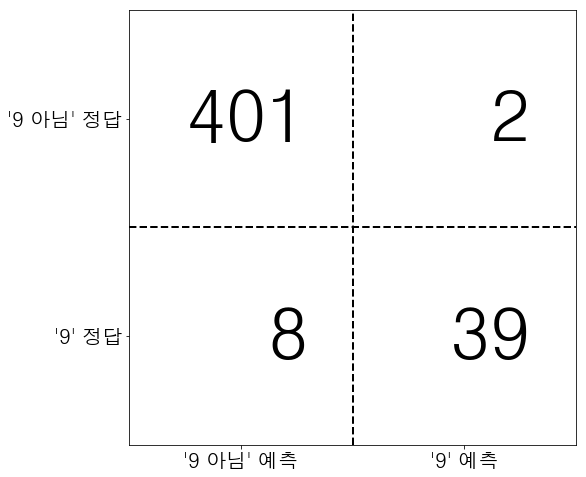

In [47]:
# 위 행렬의 의미
mglearn.plots.plot_confusion_matrix_illustration()

-> 오차 행렬의 대각 행렬은 정확히 분류된 경우, 다른 항목은 다른 클래스로 잘못 분류된 경우  
- 양성 클래스로 올바르게 분류한 샘플 : 진짜 양성(true positive)
- 음성 클래스로 정확하게 분류한 샘플 : 진짜 음성(true negative)

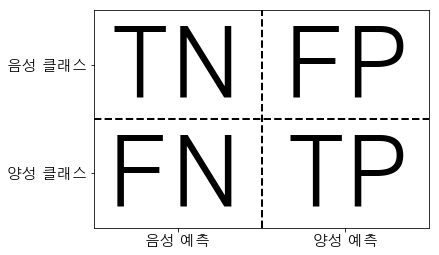

In [48]:
# (0, 0) : 거짓 음성, (0, 1) : 진짜 음성
# (1, 0) : 진짜 양성, (1, 1) : 거짓 양성
mglearn.plots.plot_binary_confusion_matrix()

In [49]:
# 앞서 만든 모델들의 오차 행렬 비교
print("빈도 기반 더미 모델 :")
print(confusion_matrix(y_test, pred_most_frequent))

print("\n무작위 더미 모델 :")
print(confusion_matrix(y_test, pred_dummy))

print("\n결정 트리 :")
print(confusion_matrix(y_test, pred_tree))

print("\n로지스틱 회귀 :")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델 :
[[403   0]
 [ 47   0]]

무작위 더미 모델 :
[[365  38]
 [ 44   3]]

결정 트리 :
[[390  13]
 [ 24  23]]

로지스틱 회귀 :
[[401   2]
 [  8  39]]


-> 전체 오차 행렬을 살펴보면 많은 정보를 얻을 수 있지만 매우 수동적이며 정성적인 방법

### - 정확도와의 관계

정확도는 정확히 예측한 수를 전체 샘플 수로 나눈 값  
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

### - 정밀도

**정밀도**(precision)는 양성으로 예측한 것 중 얼마나 많은 샘플이 진짜 양성인지 측정  
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}  
-> 정밀도는 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용  
정밀도는 **양성 예측도**(PPV)라고도 함

### - 재현율

**재현율**(recall)은 전체 양성 샘플 중에서 얼마나 많은 샘플이 양성 클래스로 분류되는지 측정  
\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}  
-> 재현율은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용 (**거짓 음성(FN)을 피하는 것이 중요할 때**)  
재현율은 **민감도**(sensitivity), **적중률**(hit rate), **진짜 양성 비율**(TPR)이라고도 함

**<재현율 최적화와 정밀도 최적화는 상충함>**  

(ex) 모든 샘플을 진짜 음성(TN)이 하나도 없고 모두 양성 클래스에 속한다고 가정  
-> 거짓 음성(FN)이 없어져 재현율은 완벽  

(ex) 모든 샘플을 양성으로 예측  
-> 거짓 양성(FP)을 많이 만듦 (정밀도 매우 낮아짐)  

(ex) 데이터 포인트 하나만 양성, 나머지 음성으로 예측  
-> 정밀도는 완벽(진짜 그 데이터 포인트가 양성이라면)  
-> 재현율은 매우 낮아짐

### - f-점수

**f-점수**(f-score)는 정밀도와 재현율의 조화 평균  
\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}  
f-측정(f-measure)이라고도 함

In [50]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score : {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score : {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score : {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score : {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score : 0.00
무작위 더미 모델의 f1 score : 0.07
트리 모델의 f1 score : 0.55
로지스틱 회귀 모델의 f1 score : 0.89


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


-> 빈도 기반 더미 모델은 양성 클래스로 예측된 것이 하나도 없어서 에러 메세지 발생  
-> 무작위 더미 분류기와 트리 분류기 사이에서도 정확도에는 없던 뚜렷한 차이 나타남  

어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1점수가 나음  
(**but!!** f1점수는 정확도보다 이해하거나 설명하기 어려운 단점 존재)

In [51]:
# 정밀도, 재현율, f1점수 모두를 한 번에 계산하여 출력하는 classification_report 함수
# 빈도 기반 더미 모델의 리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-> 오른쪽의 마지막 열은 각 클래스에 대한 진짜 샘플 수  
-> **macro avg**는 단순히 클래스별 점수의 평균 계산  
-> **weighted avg**는 클래스의 샘플 수로 가중 평균한 값 (두 클래스를 평균한 것으로 양성 클래스의 개념이 필요하지 XX)

In [52]:
# 무작위 더미 모델의 리포트
print(classification_report(y_test, pred_dummy, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.91      0.90       403
           9       0.07      0.06      0.07        47

    accuracy                           0.82       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.82      0.81       450



In [53]:
# 로지스틱 회귀 모델의 리포트
print(classification_report(y_test, pred_logreg, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



-> 어떤 클래스를 양성 클래스로 선택하는지가 이 평가 지표에 큰 영향을 끼침  
-> 모든 숫자를 함께 보면 정확한 판단을 내릴 수 있어 로지스틱 회귀 모델의 우수성을 알 수 있음

### 불확실성 고려

(ex) 음성 클래스 데이터 포인트 400개와 양성 클래스 데이터 포인트 50개로 이뤄진 불균형한 이진 분류 문제

In [54]:
X, y = make_blobs(n_samples = (400, 50), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

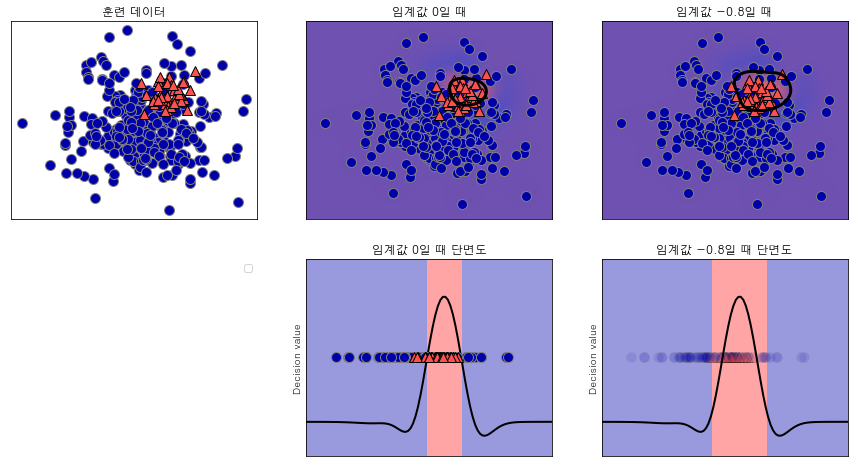

In [55]:
mglearn.plots.plot_decision_threshold()

In [56]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



-> 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있음  
(클래스 1에 대해 정밀도와 재현율이 낮음)

(ex) 클래스 1의 재현율을 높이는 게 중요하다고 가정  
-> (클래스 1로 잘못 분류된) 거짓 양성(FP)이 늘어나더라도 (재현율을 높이기 위해) 진짜 양성(TP)을 늘리려 함

In [57]:
# 더 많은 포인트가 클래스 1로 분류되기 위해 임계값을 낮춥니다.
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



-> 클래스 1의 재현율이 높아지고, 정밀도는 낮아짐

### 정밀도-재현율 곡선과 ROC 곡선